In [4]:
import pandas as pd
import matplotlib as plt


In [5]:
%store -r clean_death_counts_df
%store -r weekly_data

In [6]:
display(clean_death_counts_df.head())
display(weekly_data.head())

cause_group,Alzheimer disease and dementia,Circulatory diseases,Malignant neoplasms,Other select causes,Respiratory diseases,total
week_ending_date,,,,,,
2015-01-10,12411,38866,23871,7708,15953,98809
2015-01-17,12735,38081,23991,7766,15185,97758
2015-01-24,11649,36395,23462,7553,14352,93411
2015-01-31,11279,35525,23585,7174,13506,91069
2015-02-07,11045,36279,23454,7056,13020,90854


,Close
Date,
2021-01-10,37.012
2021-01-17,37.052
2021-01-24,36.565
2021-01-31,36.518
2021-02-07,35.088


In [7]:
def add_year_and_week(df, date_column):
    df = df.reset_index()
    df['week'] = df[date_column].dt.isocalendar().week
    df['year'] = df[date_column].dt.year
    return df

In [8]:
clean_death_counts_df = add_year_and_week(clean_death_counts_df, 'week_ending_date')
pfizer_data = add_year_and_week(weekly_data, 'Date')

In [11]:
death_count_pfizer = pd.merge(pfizer_data, clean_death_counts_df, on= ['week', 'year'])
death_count_pfizer.head()

,Date,Close,week,year,week_ending_date,Alzheimer disease and dementia,Circulatory diseases,Malignant neoplasms,Other select causes,Respiratory diseases,total
0,2021-01-10,37.012,1,2021,2021-01-09,13254,40043,22780,8601,10482,95160
1,2021-01-17,37.052,2,2021,2021-01-16,13423,40153,23812,8839,10396,96623
2,2021-01-24,36.565,3,2021,2021-01-23,13161,39246,23250,8246,9924,93827
3,2021-01-31,36.518,4,2021,2021-01-30,12376,38130,23493,8045,9829,91873
4,2021-02-07,35.088,5,2021,2021-02-06,11954,38553,23297,7921,9840,91565


In [15]:
death_count_pfizer.set_index('Date', inplace=True)

In [18]:
death_count_pfizer['total_deaths(1000s)'] = death_count_pfizer['total']/1000

<Axes: xlabel='Date'>

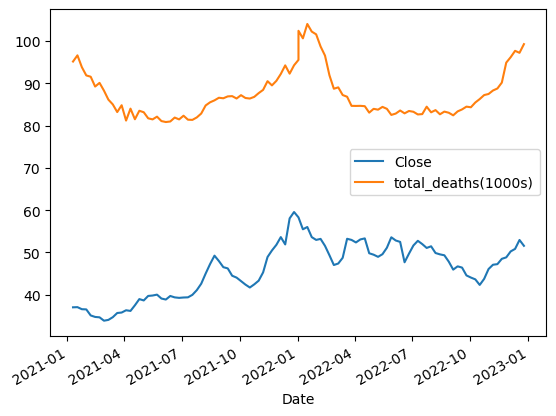

In [19]:
death_count_pfizer = death_count_pfizer[['Close','total_deaths(1000s)']]
death_count_pfizer.plot()

In [20]:
death_count_pfizer.corr()

,Close,total_deaths(1000s)
Close,1.000000,0.383565
total_deaths(1000s),0.383565,1.000000
